In [58]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime, timedelta
warnings.filterwarnings("ignore")

In [59]:
# Define the ticker symbol and the date range
ticker_symbol = "AAPL"
start_date = "2018-01-01"
end_date = "2022-12-31"

# Download historical data as a Pandas DataFrame
data = yf.download(ticker_symbol, start=start_date, end=end_date)
print(data.head())
data.shape

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-01-02  42.540001  43.075001  42.314999  43.064999  40.722878  102223600
2018-01-03  43.132500  43.637501  42.990002  43.057499  40.715782  118071600
2018-01-04  43.134998  43.367500  43.020000  43.257500  40.904915   89738400
2018-01-05  43.360001  43.842499  43.262501  43.750000  41.370628   94640000
2018-01-08  43.587502  43.902500  43.482498  43.587502  41.216957   82271200


(1259, 6)

Volatility

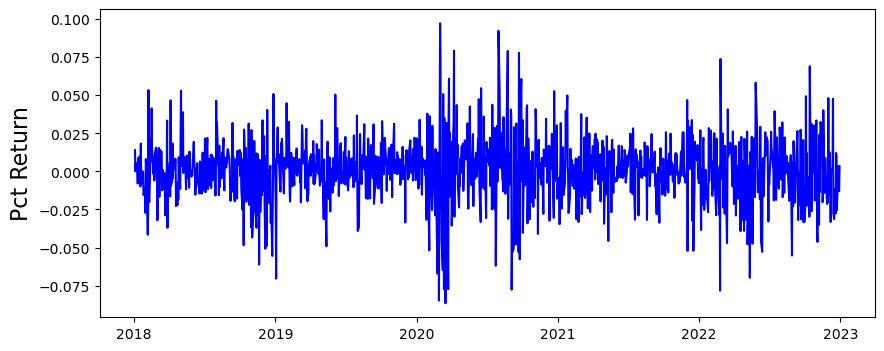

In [60]:
returns = data['Open'].pct_change().dropna()
plt.figure(figsize=(10, 4))
plt.plot(returns, color='blue', label='Pct Return')
plt.ylabel('Pct Return', fontsize=16)
plt.show()

In [61]:
data['Returns']=returns
data.dropna(inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.715782,118071600,0.013928
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.904915,89738400,0.000058
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.370628,94640000,0.005216
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.216957,82271200,0.005247
2018-01-09,43.637501,43.764999,43.352501,43.582500,41.212227,86336000,0.001147


Partial Autocorrelation

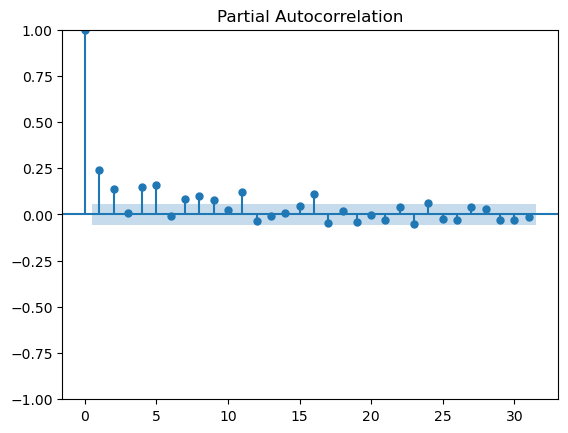

In [62]:
plot_pacf(returns**2)
plt.show()

GARCH(3,3)

In [63]:
model = arch_model(returns, p=3, q=3)

In [64]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 25850921361.60538
Iteration:      2,   Func. Count:     26,   Neg. LLF: 3480084.2876689006
Iteration:      3,   Func. Count:     42,   Neg. LLF: 267513.04395068355
Iteration:      4,   Func. Count:     57,   Neg. LLF: -3194.817349764885
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3194.817350099638
            Iterations: 8
            Function evaluations: 57
            Gradient evaluations: 4


In [65]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   Open   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3194.82
Distribution:                  Normal   AIC:                          -6373.63
Method:            Maximum Likelihood   BIC:                          -6332.54
                                        No. Observations:                 1258
Date:                Wed, Feb 07 2024   Df Residuals:                     1257
Time:                        20:11:50   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.9042e-03  1.025e-03      1.859  6.308e-02 [-1.039e-04,3.912e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.3066e-05  1.679e-05      2.565  1.033e-02 [1.015e-05,7.598e-05]
alpha[1]       0.0667      0.354      0.188      0.851     [ -0.628,  0.761]
alpha[2]       0.0667  8.323e-02      0.801      0.423  [-9.645e-02,  0.230]
alpha[3]       0.0667      0.265      0.252      0.801     [ -0.452,  0.585]
beta[1]        0.2333      0.511      0.456      0.648     [ -0.769,  1.236]
beta[2]        0.2333      4.250  5.490e-02      0.956     [ -8.096,  8.563]
beta[3]        0.2333      3.730  6.256e-02      0.950     [ -7.077,  7.544]
============================================================================

Covariance estimator: robust
"""

In [93]:
train = returns

# Fit the ARCH model
model = arch_model(train, p=3, q=3)
model_fit = model.fit()

# Forecast volatility for the next 10 days
forecast_horizon = 10
forecast = model_fit.forecast(horizon=forecast_horizon)

# Extract the forecasted volatility values
forecast_values = np.sqrt(forecast.variance.values[-1, :])

# Display the forecast values
print("Forecasted Volatility for the Next 10 Days:")
print(forecast_values)

Iteration:      1,   Func. Count:     10,   Neg. LLF: 25850921361.60538
Iteration:      2,   Func. Count:     26,   Neg. LLF: 3480084.2876689006
Iteration:      3,   Func. Count:     42,   Neg. LLF: 267513.04395068355
Iteration:      4,   Func. Count:     57,   Neg. LLF: -3194.817349764885
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3194.817350099638
            Iterations: 8
            Function evaluations: 57
            Gradient evaluations: 4
Forecasted Volatility for the Next 10 Days:
[0.01962547 0.01939265 0.01915089 0.01953108 0.01950267 0.01953556
 0.01964949 0.01968488 0.01973921 0.0197999 ]


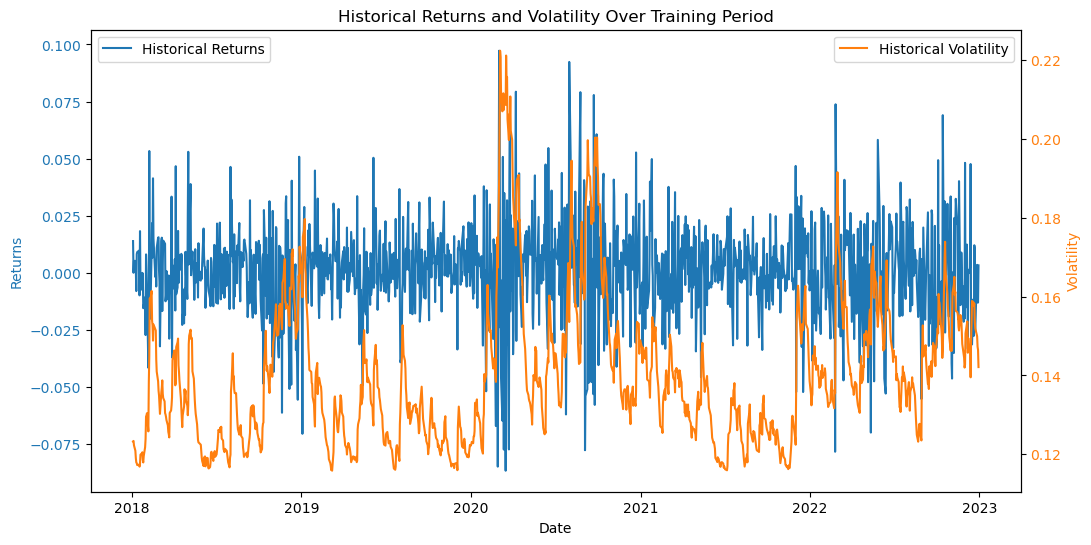

In [97]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting historical returns on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Returns', color=color)
ax1.plot(train.index, returns, label='Historical Returns', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second y-axis for historical volatility on the right
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Volatility', color=color)
ax2.plot(train.index, np.sqrt(model_fit.conditional_volatility), label='Historical Volatility', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Historical Returns and Volatility Over Training Period')
plt.show()

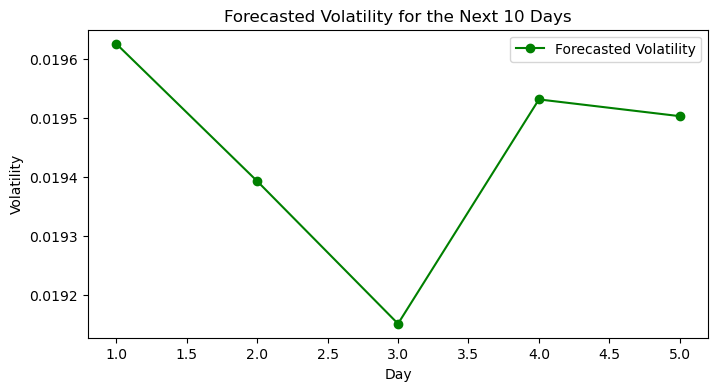

In [105]:
# Forecast volatility for the next 10 days
forecast_horizon = 5
forecast = model_fit.forecast(horizon=forecast_horizon)

# Extract the forecasted volatility values
forecast_values = np.sqrt(forecast.variance.values[-1, :])

# Plotting forecasted volatility for the next 10 days
plt.figure(figsize=(8, 4))
plt.plot(range(1, forecast_horizon + 1), forecast_values, marker='o', label='Forecasted Volatility', color='green')
plt.title('Forecasted Volatility for the Next 10 Days')
plt.xlabel('Day')
plt.ylabel('Volatility')
plt.legend()
plt.show()